## I- Exploratory analysis
### A. Dataset overview

The dataset looks as follow : 

In [2]:
# Import: 
import pandas as pd
import numpy as np

# Read and show the first few lines of the dataset:
df=pd.read_csv('Fil_rouge_TV.csv')
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


Each row corresponds to one patient. 
And for each patient there are :
- age- and sex-related information,
- <i>diagnostic keywords</i> assigned to eye-fundi (left and right)
- the corresponding <i>labels (see README.md for further information)</i>.

A quick look at the dataset info and descriptions shows that : 
- no data are missing,
- no lines are duplicated,
- sex-related data are dtype 'object' & may need to be converted to 'int',
- there is a class imbalance problem in regards of the labels <i>(see mean of the different labels N to O in df.describe() below)</i>.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         3500 non-null   int64 
 1   Patient Age                3500 non-null   int64 
 2   Patient Sex                3500 non-null   object
 3   Left-Fundus                3500 non-null   object
 4   Right-Fundus               3500 non-null   object
 5   Left-Diagnostic Keywords   3500 non-null   object
 6   Right-Diagnostic Keywords  3500 non-null   object
 7   N                          3500 non-null   int64 
 8   D                          3500 non-null   int64 
 9   G                          3500 non-null   int64 
 10  C                          3500 non-null   int64 
 11  A                          3500 non-null   int64 
 12  H                          3500 non-null   int64 
 13  M                          3500 non-null   int64 
 14  O       

In [3]:
df.describe()

,ID,Patient Age,N,D,G,C,A,H,M,O
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,2218.233143,57.854000,0.325714,0.322286,0.061429,0.060571,0.046857,0.029429,0.049714,0.279714
std,1415.437872,11.724064,0.468708,0.467419,0.240149,0.238577,0.211363,0.169029,0.217385,0.448923
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,876.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2372.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3247.250000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### B. Population distribution
#### 1) Overall distribution of the population

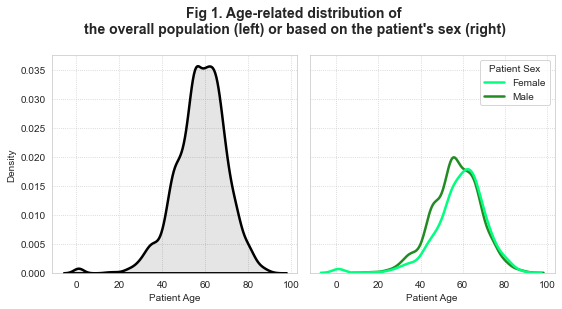

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Set the graph layout:
sns.set_style('whitegrid',{'grid.linestyle': ':'})
fig, ax = plt.subplots(1,2,sharey=True,figsize=(9,4))
fig.subplots_adjust(wspace=0.05)
fig.suptitle("Fig 1. Age-related distribution of \nthe overall population (left) or based on the patient's sex (right)", fontsize=14, fontweight="bold", y=1.05)

#Plot the data:
sns.kdeplot(ax=ax[0],x='Patient Age', data=df, legend=False, color='black',linewidth=2.5, shade=True, alpha=.1)
sns.kdeplot(ax=ax[1],x='Patient Age', hue='Patient Sex', data=df, legend=True, palette=['springgreen', 'forestgreen'], linewidth=2.5)
plt.show();

A first look at the age distribution <u>of the overall population (Fig1., left panel)</u> shows that the distribution curve exhibits : 
- a bell-like shape with a main peak centered around 55-60 years <i>(57.9, see df.describe())</i> 
- a non-symetrical shape around the mean, indicative that the population distribution might not follow a normali distribution. This is confirmed by thhe statistical analysis of the population (Shapiro test) (even when disregarding the very first small peak at the early ages) <i>(see below)</i>.

In [5]:
from scipy.stats import shapiro

print('Considering the null hypothesis H0 = the population is normally distributed.\n')
# Normality test for the overall population
stat, p = shapiro(df['Patient Age'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print("the overall population is normally distributed (H0).")
else:
    print("the overall population is not normally distributed (reject H0).\n")
    
# Normality test for the population from 20 to 100 years old.
TwentoHun=df.loc[(df['Patient Age']>20) & (df['Patient Age']<100)]
stat, p = shapiro(TwentoHun['Patient Age'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print("the population between 20 to 100 is normally distributed (H0).")
else:
    print("the population between 20 to 100 is not normally distributed (reject H0).\n")
 

Considering the null hypothesis H0 = the population is normally distributed.

Statistics=0.971, p=0.000
the overall population is not normally distributed (reject H0).

Statistics=0.994, p=0.000
the population between 20 to 100 is not normally distributed (reject H0).



- a much smaller peak at the very early stage of life. When looking into details, appers that most of this patients are women whose entry for the age is 1.

In [52]:
# Count number of patient below 20yo:
yng_counts = df['Patient Age'].loc[lambda x: x<20].count()
# Count number of patient below 20yo AND female:
fem_counts = df['Patient Sex'].loc[(df['Patient Age'] < 20) & (df['Patient Sex'] == 'Female')].count()
# Results:
print('There are',yng_counts,'patients below 20 years old, of which', fem_counts, 'are female.\n')
# Details:
df.loc[df['Patient Age'] <= 20]

There are 21 patients below 20 years old, of which 18 are female.



,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
1169,1242,1,Female,1242_left.jpg,1242_right.jpg,chorioretinal atrophy,normal fundus,0,0,0,0,0,0,0,1
1383,1563,1,Female,1563_left.jpg,1563_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0
1384,1564,1,Female,1564_left.jpg,1564_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0
1385,1565,1,Female,1565_left.jpg,1565_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0
1388,1568,1,Female,1568_left.jpg,1568_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0
1400,1583,1,Female,1583_left.jpg,1583_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0
1404,1588,1,Female,1588_left.jpg,1588_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0
1405,1589,1,Female,1589_left.jpg,1589_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0
1406,1590,1,Female,1590_left.jpg,1590_right.jpg,normal fundus,pathological myopia,0,0,0,0,0,0,1,0
1410,1595,1,Female,1595_left.jpg,1595_right.jpg,tessellated fundus，peripapillary atrophy,pathological myopia,0,0,0,0,0,0,1,1


<i>--> Since we won't use the age for our model, we will disregard this info and keep the patient's images, <i>diagnostic keywords</i> and <i>labels</i> to feed our model. However, we need to keep in mind that our dataset may contains some mistakes and be careful with it's clinical relevance.

Considering that i) the smaller peak of the overal distribution is exclusively made of women, ii) there might be sex-based differences in the distributions of the some diseases (i.e. label) or their age of onset, I want to assess the sex-related distribution of the population and the labels.  
    
Looking at the <u>sex-based age distribution of the population (Fig 1., right panel)</u>, it appears that:
- the sex-based distribution is similar when comparing both groups over 60,
- under 60, this distribution shows a prevalence of men within the population,
- the distribution of female patients shows a normal distribution when disregarding the smaller peak of patients with the age of 1, 
- this normal distribution is not found in male patients.

#### 2)  label-based distribution of the population

<i>Reminder : Within the dataset are 8 columns related to "Labels" : N, D, G, C, A, H, M and O, corresponding to the terms normal, diabetes, glaucoma, cataract, AMD (Age-related macular degeneration), hypertension, myopia and other diseases/abnormalities, respectively (see README.md)</i>

Looking at <u> the overall population (Fig2, green and red graphs, columns # 1 and 3)</u> for each <i>label</i>, the graphs show that: 
- there is a class imbalance with the labels "Normal", "Diabetes" and "Others" (around 30% of all patients) while other labels represent about 3 to 6% each <i>--> This confirms what was previously reported  <i>(see df.describe())</i>,
- the distribution of the cataract-positive population (green) seems deviated to the right, towards elderly population, when compared to the negative population (red) <i>--> This indicates that cataract affects a population older than the control population, which is relevant with the pathophysiology of the disease</i>,
- while AMD is also a patholgy which age of onset occurs at older ages, no such observation is made for the AMD, another, 

<i>(N.B: the graphs show the distribution of each label whether individually assigned to one eye-fundus or combined with other labels)</i>. 

Looking at <u>the sex-related distribution of each the positive group (light and dark green graphs, columns # 2 and 4)</u>, we see that some labels show a difference in the sex-related distribution with some diseases either starting earlier or being more prevalent based on the patient sex. For instance: 
- Glaucoma, hypertension, AMD and diabetes are more prevalent in men with an earlier age of onset for three of them (glaucoma, hypertension and diabetes).
- Cataract and myopia are more prevalent in women, with the latter apparently occuring at earlier age in women.

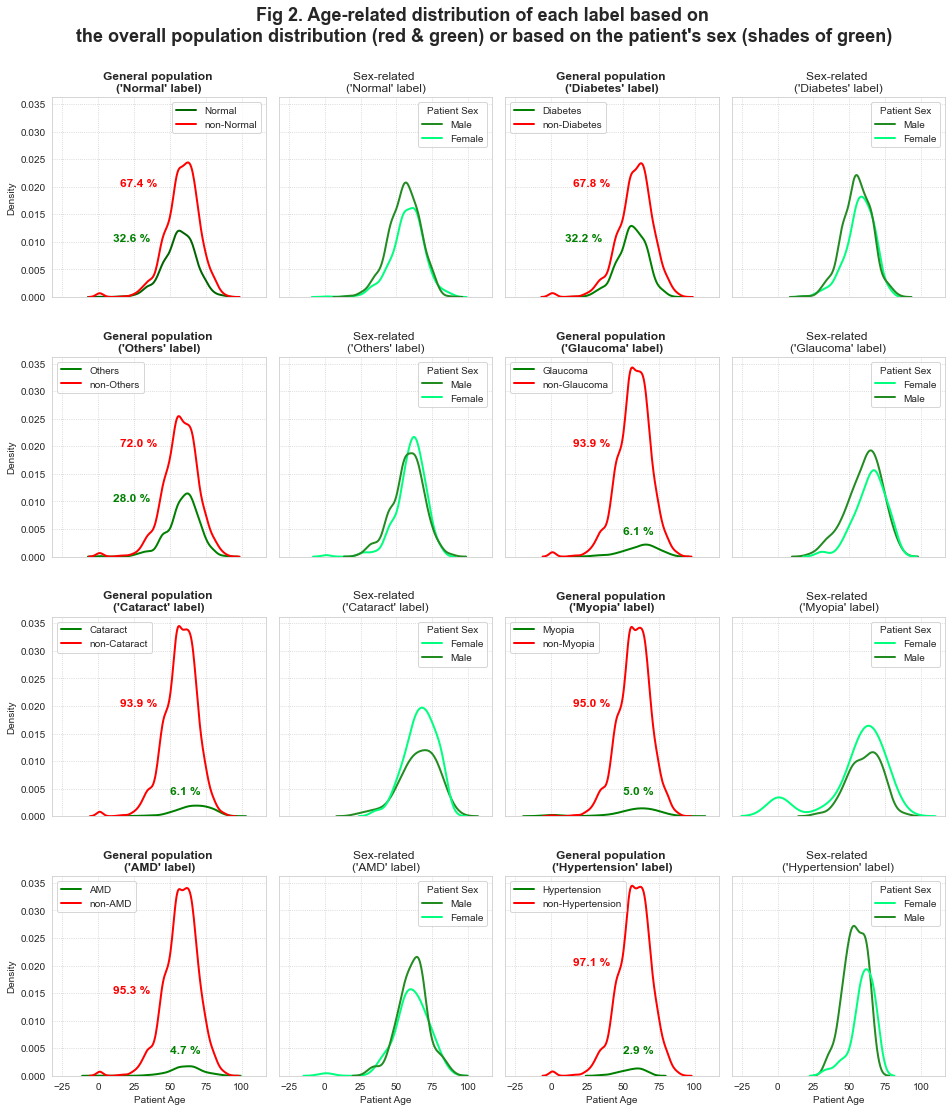

In [56]:
sns.set_style('whitegrid',{'grid.linestyle': ':'})

#Set the graph layout:
fig, ax = plt.subplots(4,4, sharex=True, sharey=True, figsize=(16,18))
fig.subplots_adjust(hspace=0.3,wspace=0.06)
fig.suptitle("Fig 2. Age-related distribution of each label based on \nthe overall population distribution (red & green) or based on the patient's sex (shades of green)",  fontsize=18, fontweight="bold", y=0.95)

#Plot the data in its corresponding frame:
ax1=sns.kdeplot(ax=ax[0, 0], x='Patient Age', hue='N', data=df, palette=['r', 'darkgreen'], linewidth=2)
#Set the design of the graph:
ax1.legend(labels=['Normal', 'non-Normal'])
ax1.text(15, 0.02,'67.4 %', fontsize=9, color='red', size= 12, weight='bold')
ax1.text(10, 0.01,'32.6 %', fontsize=9, color='green', size= 12, weight='bold')

#Repeat for other data:
ax2=sns.kdeplot(ax=ax[0, 2], x='Patient Age', hue='D', data=df, palette=['r', 'g'], linewidth=2)
ax2.legend(loc='upper left', labels=['Diabetes', 'non-Diabetes'])
ax2.text(15, 0.02,'67.8 %', fontsize=9, color='red', size= 12, weight='bold')
ax2.text(10, 0.01,'32.2 %', fontsize=9, color='green', size= 12, weight='bold')

ax3=sns.kdeplot(ax=ax[1, 0], x='Patient Age', hue='O', data=df, palette=['r', 'g'], linewidth=2)
ax3.legend(loc='upper left', labels=['Others', 'non-Others'])
ax3.text(15, 0.02,'72.0 %', fontsize=9, color='red', size= 12, weight='bold')
ax3.text(10, 0.01,'28.0 %', fontsize=9, color='green', size= 12, weight='bold')

ax4=sns.kdeplot(ax=ax[1, 2], x='Patient Age', hue='G', data=df, palette=['r', 'g'], linewidth=2)
ax4.legend(loc='upper left', labels=['Glaucoma', 'non-Glaucoma'])
ax4.text(15, 0.02,'93.9 %', fontsize=9, color='red', size= 12, weight='bold')
ax4.text(50, 0.004,'6.1 %', fontsize=9, color='green', size= 12, weight='bold')

ax5=sns.kdeplot(ax=ax[2, 0], x='Patient Age', hue='C', data=df, palette=['r', 'g'], linewidth=2)
ax5.legend(loc='upper left', labels=['Cataract', 'non-Cataract'])
ax5.text(15, 0.02,'93.9 %', fontsize=9, color='red', size= 12, weight='bold')
ax5.text(50, 0.004,'6.1 %', fontsize=9, color='green', size= 12, weight='bold')

ax6=sns.kdeplot(ax=ax[2, 2], x='Patient Age', hue='M', data=df, palette=['r', 'g'], linewidth=2)
ax6.legend(loc='upper left', labels=['Myopia', 'non-Myopia'])
ax6.text(15, 0.02,'95.0 %', fontsize=9, color='red', size= 12, weight='bold')
ax6.text(50, 0.004,'5.0 %', fontsize=9, color='green', size= 12, weight='bold')

ax7=sns.kdeplot(ax=ax[3, 0], x='Patient Age', hue='A', data=df, palette=['r', 'g'], linewidth=2)
ax7.legend(loc='upper left', labels=['AMD', 'non-AMD'])
ax7.text(10, 0.015,'95.3 %', fontsize=9, color='red', size= 12, weight='bold')
ax7.text(50, 0.004,'4.7 %', fontsize=9, color='green', size= 12, weight='bold')

ax8=sns.kdeplot(ax=ax[3, 2], x='Patient Age', hue='H', data=df, palette=['r', 'g'], linewidth=2)
ax8.legend(loc='upper left', labels=['Hypertension', 'non-Hypertension'])
ax8.text(15, 0.02,'97.1 %', fontsize=9, color='red', size= 12, weight='bold')
ax8.text(50, 0.004,'2.9 %', fontsize=9, color='green', size= 12, weight='bold')

ax1.set_title("General population \n('Normal' label)", fontdict = {'fontweight':'semibold'})
ax2.set_title("General population \n('Diabetes' label)", fontdict = {'fontweight':'semibold'})
ax3.set_title("General population \n('Others' label)", fontdict = {'fontweight':'semibold'})
ax4.set_title("General population \n('Glaucoma' label)", fontdict = {'fontweight':'semibold'})
ax5.set_title("General population \n('Cataract' label)", fontdict = {'fontweight':'semibold'})
ax6.set_title("General population \n('Myopia' label)", fontdict = {'fontweight':'semibold'})
ax7.set_title("General population \n('AMD' label)", fontdict = {'fontweight':'semibold'})
ax8.set_title("General population \n('Hypertension' label)", fontdict = {'fontweight':'semibold'})

ax11=sns.kdeplot(ax=ax[0, 1], x='Patient Age', hue='Patient Sex', data=df[df.N == 1], legend=True, palette=['forestgreen', 'springgreen'], linewidth=2)
ax21=sns.kdeplot(ax=ax[0, 3], x='Patient Age', hue='Patient Sex', data=df[df.D == 1], legend=True, palette=['forestgreen', 'springgreen'], linewidth=2)
ax31=sns.kdeplot(ax=ax[1, 1], x='Patient Age', hue='Patient Sex', data=df[df.O == 1], legend=True, palette=['forestgreen', 'springgreen'], linewidth=2)
ax41=sns.kdeplot(ax=ax[1, 3], x='Patient Age', hue='Patient Sex', data=df[df.G == 1], legend=True, palette=['springgreen', 'forestgreen'], linewidth=2)
ax51=sns.kdeplot(ax=ax[2, 1], x='Patient Age', hue='Patient Sex', data=df[df.C == 1], legend=True, palette=['springgreen', 'forestgreen'], linewidth=2)
ax61=sns.kdeplot(ax=ax[2, 3], x='Patient Age', hue='Patient Sex', data=df[df.M == 1], legend=True, palette=['springgreen', 'forestgreen'], linewidth=2)
ax71=sns.kdeplot(ax=ax[3, 1], x='Patient Age', hue='Patient Sex', data=df[df.A == 1], legend=True, palette=['forestgreen', 'springgreen'], linewidth=2)
ax81=sns.kdeplot(ax=ax[3, 3], x='Patient Age', hue='Patient Sex', data=df[df.H == 1], legend=True, palette=['springgreen', 'forestgreen'], linewidth=2)
                
ax11.title.set_text("Sex-related \n('Normal' label)")
ax21.title.set_text("Sex-related \n('Diabetes' label)")
ax31.title.set_text("Sex-related \n('Others' label)")
ax41.title.set_text("Sex-related \n('Glaucoma' label)")
ax51.title.set_text("Sex-related \n('Cataract' label)")
ax61.title.set_text("Sex-related \n('Myopia' label)")
ax71.title.set_text("Sex-related \n('AMD' label)")
ax81.title.set_text("Sex-related \n('Hypertension' label)")

plt.show();

<i>--> Based on this first analysis, the observations made about the population distribution indicates that an expert opinion is required to assess the medical whether based on the overall or sex-, age- & label-based distribution. Indeed, this expertise is important to: 
- <i>determine whether some of the patient's information, such as age and sex, might be of interest when training a classification model, particularly given that the some diseases are age-related and that our dataset might contains images of different stage of any given disease (see README.md),
- <i>ensure the model developed will be relevant to real-life cases if later deployed.</i>


### C. Diagnostic Keywords 
For each fundus there is a multiplicity of diagnostic keywords used by the medical team, each being possibly associated with others <i>(see README.md)</i>.
Thus, there are:

In [6]:
print("-",df['Left-Diagnostic Keywords'].nunique(),"diagnostic keywords (in association or alone) assigned to left fundi")
print("-",df['Right-Diagnostic Keywords'].nunique(),"diagnostic keywords (in association or alone) assigned to right fundi")

- 227 diagnostic keywords (in association or alone) assigned to left fundi
- 233 diagnostic keywords (in association or alone) assigned to right fundi


Using a Wordcloud to have a quick look at the different terms, it appears that there is:
<br>- a strong predominance of the terms "normal fundus" as well as "retinopathy" (a term related to diabetes) for both left and right fundi, <i>both of which having been previously reported as major classes (see df.describe())</i>,
<br>- technical-issues-related terms ("lens" and "dust") within each left and right fundi seems to be slightly more represented than some disease-related terms ("myopia"), indicative of potential bias to come (and their weights) in the image analysis, 
<br>- slight differences in some terms such as "degeneration", "cataract" or "glaucoma" when comparing left and right fundi <i> for which an expert opinion could help determine whether this is indicative of a clinical relevance of our dataset or of an other bias (whether technical, interpretative, or in the recruitment of the patients)</i>.

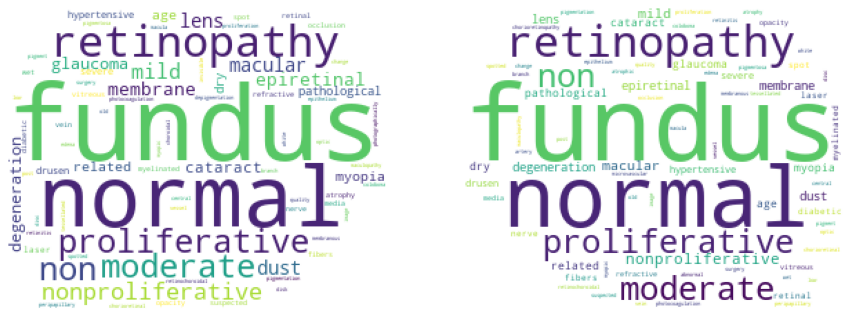

In [8]:
from PIL import Image
from nltk.tokenize import PunktSentenceTokenizer 
from wordcloud import WordCloud


left_eye=pd.DataFrame(data=df['Left-Diagnostic Keywords'].astype(str))
left_eye=left_eye['Left-Diagnostic Keywords'].str.cat(sep=', ')
left_tokens=PunktSentenceTokenizer().tokenize(left_eye)

right_eye=pd.DataFrame(data=df['Right-Diagnostic Keywords'].astype(str))
right_eye=right_eye['Right-Diagnostic Keywords'].str.cat(sep=', ')
right_tokens=PunktSentenceTokenizer().tokenize(right_eye)

mask_left = np.array(Image.open("/Users/user/Desktop/Datascientest/Fil_rouge/Images for report/Leftbw2.jpg"))
mask_right = np.array(Image.open("/Users/user/Desktop/Datascientest/Fil_rouge/Images for report/Rightbw2.jpg"))
wc_left = WordCloud(background_color="white", max_words=1000, max_font_size=90, collocations=False, random_state=42, mask=mask_left)
wc_right = WordCloud(background_color="white", max_words=1000, max_font_size=90, collocations=False, random_state=42, mask=mask_right)

fig, ax = plt.subplots(1,2,figsize=(15,10))
left=wc_left.generate(left_eye) 
right=wc_right.generate(right_eye)
ax[0].imshow(wc_left) 
ax[1].imshow(wc_right) 
ax[0].grid(False)
ax[1].grid(False)
ax[0].axis('off')
ax[1].axis('off')
plt.show();

### D. Labels

<br> With 200+ diagnostic keywords for each fundus and the label assignment relying on the diagnostic keywords of both patient's fundi, it is important to determine the actual correspondence between labels and keywords.

Indeed, the label assigment shows disparity as:
<br>- N is assigned only if <i>both eye fundi</i> are considered normal (e.g. patients ID 0 & 1),
<br>- disease-related labels (D to H) are assigned as long as their corresponding diagnostic keywords is used for <i>at least one eye fundus</i> (e.g. patients ID 0),
<br>- O is assigned whenever <i>at least one eye fundus</i> has a <i>non-label-related diagnostic</i> keyword (e.g. patient ID 3) <i>or</i> a <i>technical-related</i> keyword (e.g. 'laser spot', patient ID 2)

<i>(see README.md)</i>

In [9]:
df.head(4)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1


### Conclusion 

<b> For this project, I will disregard all concerns about the clinical relevance of the dataset but in the proper setting, this should definitely be adressed before going any further.
    
<b> Thus, I will start addressing the issue of the patient-based dataset to change it into a fundus-based dataset <i>(see README.md)</i>. 

<b> To do so, I will:
- <b>split both left and right eye fundus apart,
- <b>pool back each fundus with their specific <i>diagnostic keywords</i>,
- <b>assess the distribution, weight and homogeneity of the <i>diagnostic keywords</i>,
- <b>reassigned their proper label so each row corresponds to one eye fundus and its related info
   
<b> This way I hope to optimize the training and allow for proper classification of future model. 